In [1]:
import h5py
import numpy as np
import scipy
import itertools
from scipy.io import loadmat
import matplotlib.pyplot as plt

import sklearn
from sklearn.metrics import confusion_matrix

import pandas as pd
import tensorflow as tf
print(tf.__version__)

from keras.models import Sequential, load_model
from tensorflow.keras.layers import Reshape, Flatten, Dense, Conv1D ,Conv2D, MaxPooling2D, MaxPooling1D,Dropout
from tensorflow.keras.models import Model
from tensorflow.keras.optimizers import SGD, Adam, Adamax
from tensorflow.keras.preprocessing.text import Tokenizer
from tensorflow.keras.preprocessing.sequence import pad_sequences

2022-03-20 06:39:12.582362: W tensorflow/stream_executor/platform/default/dso_loader.cc:64] Could not load dynamic library 'libcudart.so.11.0'; dlerror: libcudart.so.11.0: cannot open shared object file: No such file or directory; LD_LIBRARY_PATH: /home/user12/Radio/lib/:
2022-03-20 06:39:12.582391: I tensorflow/stream_executor/cuda/cudart_stub.cc:29] Ignore above cudart dlerror if you do not have a GPU set up on your machine.


2.7.0


In [2]:
def evaluation_tf(report, y_test, y_pred, classes):
    plt.plot(report.history['loss'], label = 'training_loss')
    plt.plot(report.history['val_loss'], label = 'validation_loss')
    plt.legend()
    plt.show()
    plt.plot(report.history['accuracy'], label = 'training_accuracy')
    plt.plot(report.history['val_accuracy'], label = 'validation_accuracy')
    plt.legend()
    plt.show()
    
    cm = confusion_matrix(y_test, y_pred)
    plt.figure(figsize=(6,6))
    plt.imshow(cm, cmap=plt.cm.Blues)
    print(cm.shape[0],cm.shape[1])
    for i,j in itertools.product(range(cm.shape[0]), range(cm.shape[1])):
        plt.text(j, i, format(cm[i,j], 'd'),
                 horizontalalignment = 'center',
                 color='black')

    plt.xlabel("Predicted labels")
    plt.ylabel("True labels")
    tick_marks = np.arange(len(classes))
    plt.xticks(tick_marks, classes, rotation=45)
    plt.yticks(tick_marks, classes)
    plt.title('Confusion matrix')
    plt.colorbar()
    plt.show()

In [3]:
model = load_model("/home/user12/Documents/MODCOD_Dir/Mod_3L_4D_NL_tan_16S16.h5")

2022-03-20 06:39:13.830956: W tensorflow/stream_executor/platform/default/dso_loader.cc:64] Could not load dynamic library 'libcuda.so.1'; dlerror: libcuda.so.1: cannot open shared object file: No such file or directory; LD_LIBRARY_PATH: /home/user12/Radio/lib/:
2022-03-20 06:39:13.830983: W tensorflow/stream_executor/cuda/cuda_driver.cc:269] failed call to cuInit: UNKNOWN ERROR (303)
2022-03-20 06:39:13.831006: I tensorflow/stream_executor/cuda/cuda_diagnostics.cc:156] kernel driver does not appear to be running on this host (ipt-Precision-7920-Tower): /proc/driver/nvidia/version does not exist
2022-03-20 06:39:13.831253: I tensorflow/core/platform/cpu_feature_guard.cc:151] This TensorFlow binary is optimized with oneAPI Deep Neural Network Library (oneDNN) to use the following CPU instructions in performance-critical operations:  AVX2 AVX512F FMA
To enable them in other operations, rebuild TensorFlow with the appropriate compiler flags.


In [4]:
filename = "/home/user12/Saad_External/MODCOD_DataSet/MOD_DATASET/MOD_Rician0p3fadded_16Samp_N_NN1.h5"
f = h5py.File(filename, 'r')
a_group_key = list(f.keys())
print (a_group_key)


['DATA', 'DATATYPE', 'SNR']


In [5]:
data = np.array(f[a_group_key[0]])            #(600000, 256, 4)
datatype = np.array(f[a_group_key[1]])         #(600000, 1)
SNR = np.array(f[a_group_key[2]])               #(600000, 1)

print(data.shape)
print(datatype.shape)
print(SNR.shape)

(600000, 256, 4)
(600000, 1)
(600000, 1)


In [6]:
print(type(data)) 
print(type(datatype))
print(type(SNR))

print(data.shape)
print(datatype.shape)
print(SNR.shape)

<class 'numpy.ndarray'>
<class 'numpy.ndarray'>
<class 'numpy.ndarray'>
(600000, 256, 4)
(600000, 1)
(600000, 1)


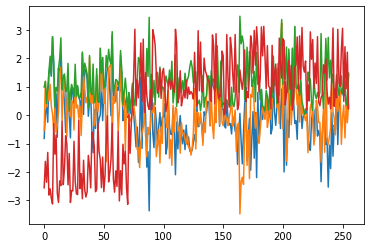

[-8.20568187e-01  6.62757150e-02  2.88034518e-01 -2.51946897e-01
  1.45510135e+00  1.76624809e+00  1.36417110e+00  2.75481885e+00
  1.76561180e+00 -5.48752705e-02  7.45975756e-01 -7.78885864e-01
  1.64355239e+00  1.34194704e+00  2.13547461e+00  8.83488677e-01
  1.01615087e+00  4.41080724e-01 -6.14041788e-01  4.68196382e-01
  1.40258183e+00 -3.10121364e-02 -7.99038031e-01  9.50096024e-01
  8.22840396e-01  3.97064272e-01  1.23561550e+00  6.23216536e-01
  9.77913919e-01  6.16931013e-01  5.09145702e-01 -3.78315996e-01
  2.17111136e+00  2.28504538e-02  1.59080583e+00  1.59511827e+00
  1.29407728e+00 -4.02217299e-02  4.99138114e-01  6.86081111e-01
 -5.89889570e-01 -1.32389947e+00  1.95504322e-01 -4.68951123e-01
  1.39913089e+00 -4.60440848e-01 -1.29225474e-01  6.87608324e-03
  1.22068400e+00 -1.93259927e-01  8.50213041e-01  6.01943156e-01
  1.31050822e+00  1.66479440e+00  1.62573442e+00  8.48736303e-01
 -2.46139720e-02  2.81404779e+00  5.21997050e-01  9.00821695e-01
  4.75191162e-01  9.84024

In [7]:
point = 800
plt.plot(data[point,:,0])
plt.plot(data[point,:,1])
plt.plot(data[point,:,2])
plt.plot(data[point,:,3])

plt.show()

print(data[point,:,0])
print(datatype[point])
print(SNR[point])

# 0--BPSK , 1--QPSK , 2--PSK8 , 3--PSK16, 4--QAM16 , 5--QAM32
# [-4:2:14]

In [8]:
#data = f[a_group_key[0]]              #(600000, 256, 4)
#datatype = f[a_group_key[1]]          #(600000, 1)
#SNR = f[a_group_key[2]]               #(600000, 1)


#print(data.shape)
#print(datatype.shape)
#print(SNR.shape)

# Six different Modulation each with 100000 in length
# SNR... 10 bins for each modulation

# Result should be list of pair--- (16 symbols packet--- 256, Modulation Scheme (0...5))

# Write into pre-processed training data!

In [9]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(data, datatype, test_size = 0.2)

In [10]:
print(X_train.shape)
print(X_test.shape)
print(y_train.shape)
print(y_test.shape)
                
                

(480000, 256, 4)
(120000, 256, 4)
(480000, 1)
(120000, 1)


In [11]:
report = model.fit(X_train, y_train, epochs = 20, validation_data=(X_test, y_test))

2022-03-20 06:40:34.615343: W tensorflow/core/framework/cpu_allocator_impl.cc:82] Allocation of 1966080000 exceeds 10% of free system memory.


Epoch 1/20
15000/15000 [==============================] - 240s 16ms/step - loss: 0.4234 - accuracy: 0.8298 - val_loss: 0.2806 - val_accuracy: 0.8805
Epoch 2/20
15000/15000 [==============================] - 245s 16ms/step - loss: 0.3042 - accuracy: 0.8796 - val_loss: 0.2609 - val_accuracy: 0.8951
Epoch 3/20
15000/15000 [==============================] - 244s 16ms/step - loss: 0.2741 - accuracy: 0.8932 - val_loss: 0.2471 - val_accuracy: 0.9047
Epoch 4/20
15000/15000 [==============================] - 253s 17ms/step - loss: 0.2587 - accuracy: 0.9006 - val_loss: 0.2139 - val_accuracy: 0.9179
Epoch 5/20
15000/15000 [==============================] - 256s 17ms/step - loss: 0.2498 - accuracy: 0.9044 - val_loss: 0.2151 - val_accuracy: 0.9184
Epoch 6/20
15000/15000 [==============================] - 254s 17ms/step - loss: 0.2414 - accuracy: 0.9083 - val_loss: 0.2934 - val_accuracy: 0.8941
Epoch 7/20
15000/15000 [==============================] - 256s 17ms/step - loss: 0.2355 - accuracy: 0.9097

In [12]:
model.save('Mod_3L_4D_16S16_TF_NL_0p3ricianfadded_N.h5')

In [13]:
y_pred = model.predict(X_test).argmax(axis = 1)

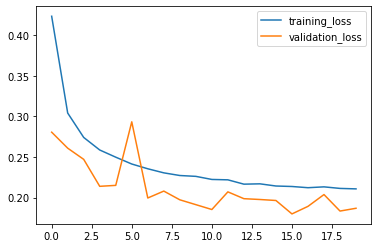

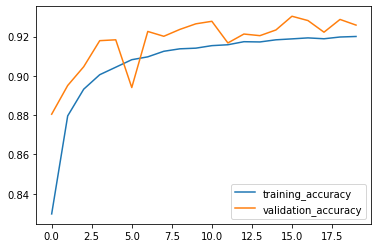

6 6


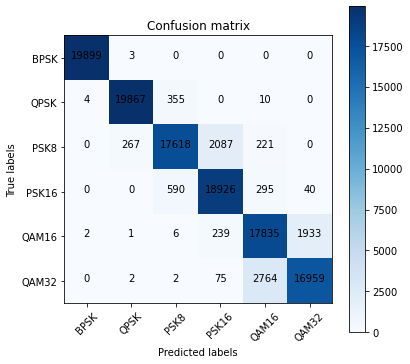

In [14]:
# 0--BPSK , 1--QPSK , 2--PSK8 , 3--PSK16, 4--QAM16 , 5--QAM32
Y = ['BPSK','QPSK','PSK8','PSK16','QAM16','QAM32']
evaluation_tf(report, y_test, y_pred, Y)